# Bank Churn Prediction

## Objective:

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Context:

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Data Description:

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.
Link to the Kaggle project site:https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling

### Data Dictionary:
    
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?

In [1]:
#Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc
from tensorflow.keras import optimizers

### Read the dataset

In [24]:
data = pd.read_csv('bank.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [25]:
data.shape

(10000, 14)

In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


### Drop the columns which are unique for all users like IDs (5 points)

In [27]:
# Droping columns that are unique to each customer and won't be important in determining churn rate
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
# Let's check if any of the data is null
data.isna().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

### Perform bivariate analysis and give your insights from the same (5 points) 

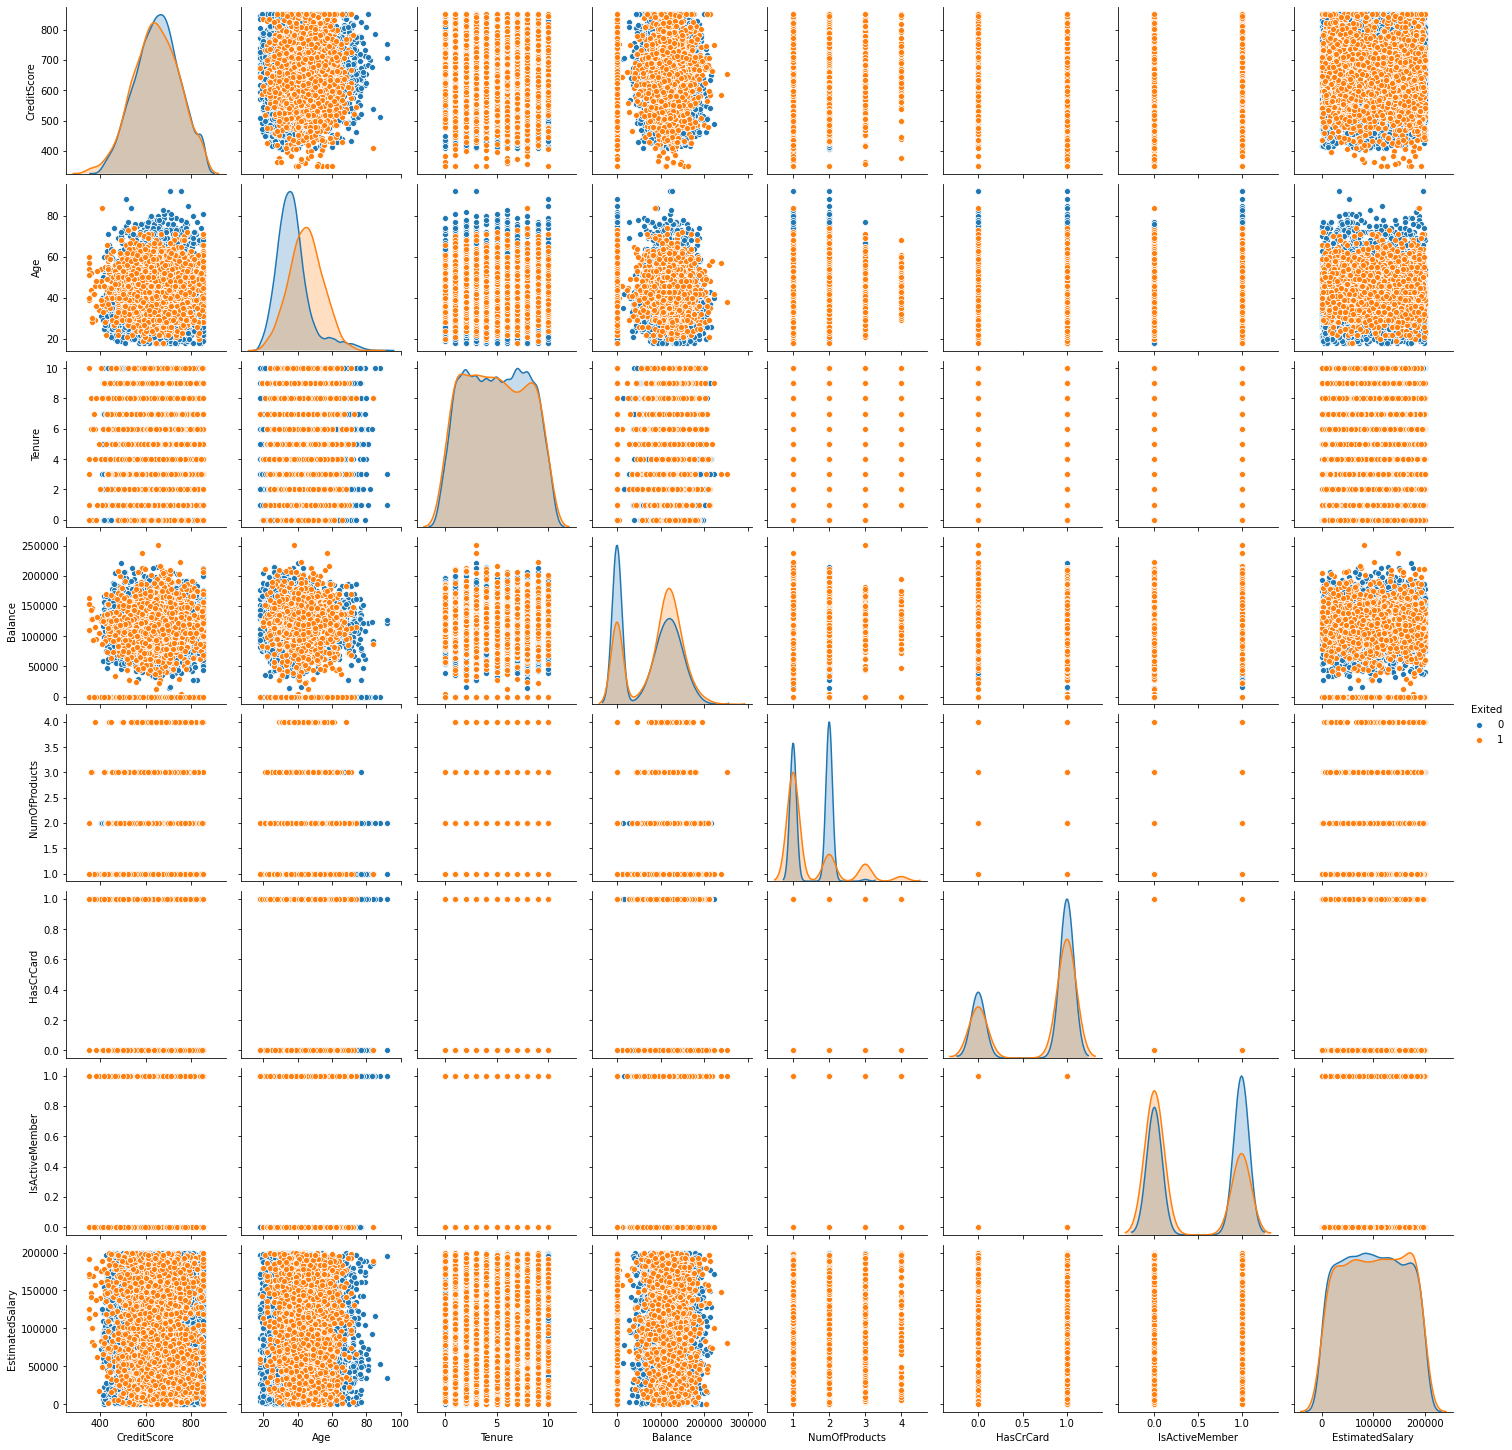

In [29]:
#Look at a pairplot to see if any features are coorelated with the target variable
sns.pairplot(data, hue = 'Exited');

**Insights:** `Looking for regression line to determine if there is any correlation in the data. There doesn't seem to be any coorelation.`

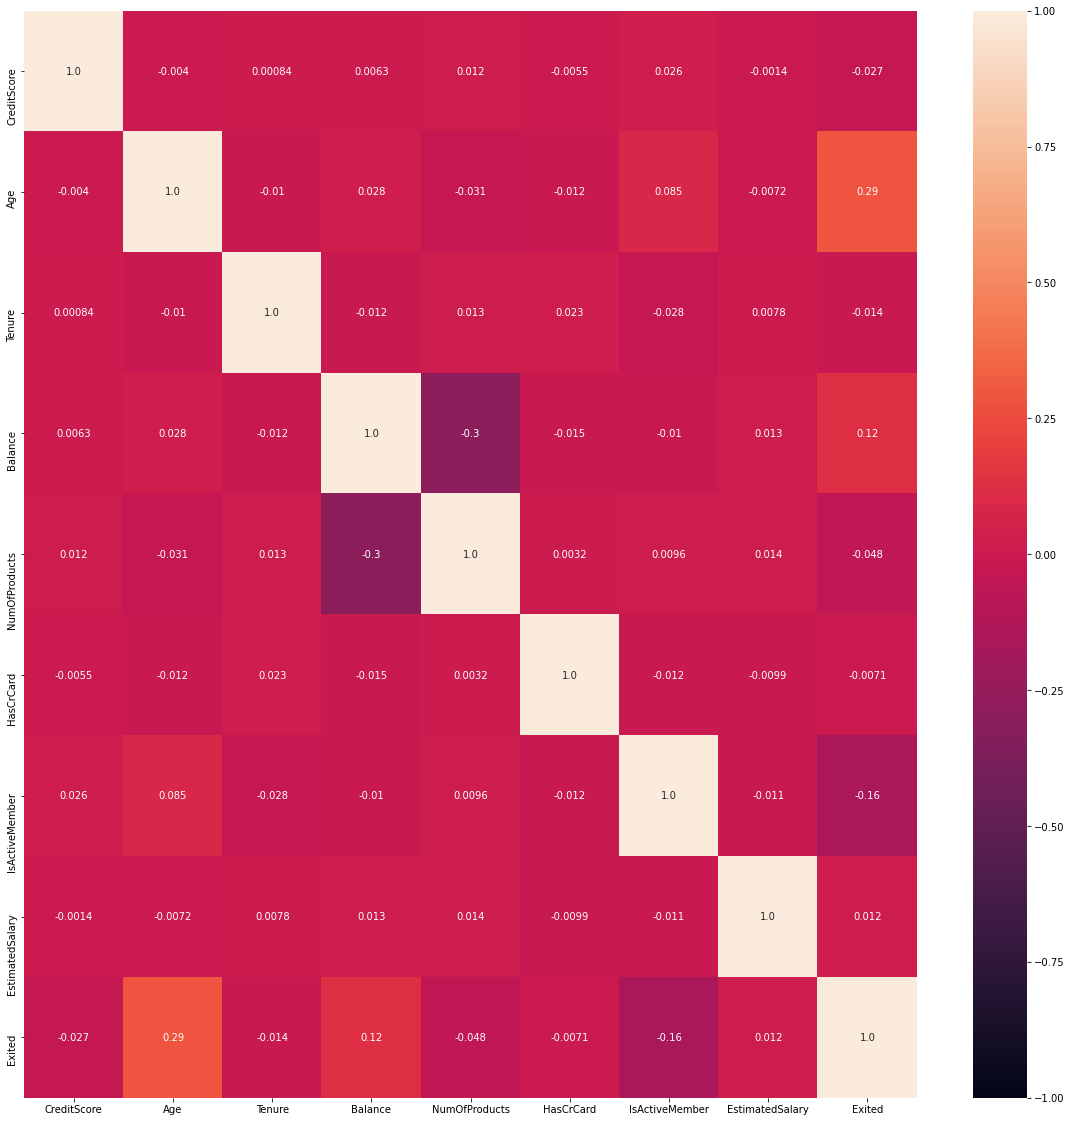

In [10]:
# Using the heatmap to get a better look at possible correlation
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, fmt=".2",vmin=-1, vmax=1)
plt.show()

**Insights:** `Here, we should be looking at coorelation between each feature and the target which is the variable 'Exited.' The variables don't seem to directly coorelate to the target individually. It is predicted that the features affect the target variable when combined.`

### Distinguish the feature and target set and divide the data set into training and test sets (5 points)

In [30]:
#just some basic preprocessing
data.drop_duplicates()
#creating dummy variables for the categorical features
data = pd.get_dummies(data)
data = data.astype('float32') # we will need to convert the dataset to float in order to be able to convert it into tensors later.
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,619.0,42.0,2.0,0.000000,1.0,1.0,1.0,101348.882812,1.0,1.0,0.0,0.0,1.0,0.0
1,608.0,41.0,1.0,83807.859375,1.0,0.0,1.0,112542.578125,0.0,0.0,0.0,1.0,1.0,0.0
2,502.0,42.0,8.0,159660.796875,3.0,1.0,0.0,113931.570312,1.0,1.0,0.0,0.0,1.0,0.0
3,699.0,39.0,1.0,0.000000,2.0,0.0,0.0,93826.632812,0.0,1.0,0.0,0.0,1.0,0.0
4,850.0,43.0,2.0,125510.820312,1.0,1.0,1.0,79084.101562,0.0,0.0,0.0,1.0,1.0,0.0


In [31]:
data.shape

(10000, 14)

In [34]:
#getting the features and labels and finally splitting the test and train data.
X = data[['CreditScore', 'Age', 'Tenure', 'Balance', 
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 
       'Geography_France', 'Geography_Germany', 'Geography_Spain',
       'Gender_Female', 'Gender_Male']]
Y = data['Exited']


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=1)

### Normalize the train and test data (10 points)

In [35]:
X_train = preprocessing.normalize(X_train)

In [36]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8000, 13)
(2000, 13)
(8000,)
(2000,)


### Initialize & build the model. Identify the points of improvement and implement the same. (20 points)

In [37]:
# Initialize the model
model = Sequential()

In [38]:
# Building the model with the following layers
model.add(Dense(64, input_shape = (13,), activation = 'relu'))
model.add(Dense(32, activation = 'elu'))
model.add(Dense(1, activation = 'sigmoid'))

In [39]:
# Optimizer
sgd = optimizers.Adam(lr = 0.001)

In [40]:
# Compile the model
model.compile(optimizer = sgd, loss = 'binary_crossentropy', metrics=['accuracy'])

In [41]:
# Model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                896       
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 3,009
Trainable params: 3,009
Non-trainable params: 0
_________________________________________________________________


In [42]:
# Train the model
model.fit(X_train, y_train.values, batch_size = 40, epochs = 10, verbose = 1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 1s 78us/sample - loss: 0.5071 - accuracy: 0.7933
Epoch 2/10
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4980 - accuracy: 0.7972
Epoch 3/10
8000/8000 [==============================] - 0s 27us/sample - loss: 0.4977 - accuracy: 0.7972
Epoch 4/10
8000/8000 [==============================] - 0s 26us/sample - loss: 0.4975 - accuracy: 0.7972
Epoch 5/10
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4972 - accuracy: 0.7972
Epoch 6/10
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4972 - accuracy: 0.7972
Epoch 7/10
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4971 - accuracy: 0.7972
Epoch 8/10
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4972 - accuracy: 0.7972
Epoch 9/10
8000/8000 [==============================] - 0s 28us/sample - loss: 0.4979 - accuracy: 0.7972
Epoch 10/10
8000/8000 [==========

**Insights:** `I'm curious why each epoch contains 8000 iterations. I would expect there to be 200 iterations in each epoch. `

### Print the Accuracy score and confusion matrix (5 points)

In [43]:
# Accuracy Score
X_test = preprocessing.normalize(X_test)
results = model.evaluate(X_test, y_test.values)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [44]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.5062433018684387, 0.7925]


**Insights:** `The accuracy score of the model is 79%. The loss value is not very high. These suggest that the model is predicting decently but can probably be improved.`

In [58]:
# Confusion Matrix
Y_pred_cls = model.predict_classes(X_test, batch_size=20, verbose=0)
print('Accuracy Model1: '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1: 0.7925
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[1585,    0],
       [ 415,    0]], dtype=int64)

**Insights:** `According to this confusion matrix, there were no true positves or false positves so it seems that there may be some error with the model.`

### Improve the model

In [59]:
# Changing the learning rate to attempt improving the model
sgd2 = optimizers.Adam(lr = 0.0001)

In [60]:
# Re-compile model
model.compile(optimizer = sgd2, loss = 'binary_crossentropy', metrics=['accuracy'])

In [61]:
# Re-train the model
model.fit(X_train, y_train.values, batch_size = 40, epochs = 10, verbose = 1)

Train on 8000 samples
Epoch 1/10
8000/8000 [==============================] - 0s 58us/sample - loss: 0.4967 - accuracy: 0.7972
Epoch 2/10
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4965 - accuracy: 0.7972
Epoch 3/10
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4964 - accuracy: 0.7972
Epoch 4/10
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4964 - accuracy: 0.7972
Epoch 5/10
8000/8000 [==============================] - 0s 33us/sample - loss: 0.4964 - accuracy: 0.7972
Epoch 6/10
8000/8000 [==============================] - 0s 25us/sample - loss: 0.4964 - accuracy: 0.7972
Epoch 7/10
8000/8000 [==============================] - 0s 22us/sample - loss: 0.4964 - accuracy: 0.7972
Epoch 8/10
8000/8000 [==============================] - 0s 23us/sample - loss: 0.4964 - accuracy: 0.7972
Epoch 9/10
8000/8000 [==============================] - 0s 24us/sample - loss: 0.4964 - accuracy: 0.7972s - loss: 0.4929 - accuracy: 
Epoc

In [62]:
# Accuracy Score
X_test = preprocessing.normalize(X_test)
results = model.evaluate(X_test, y_test.values)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [63]:
print(model.metrics_names)
print(results)

['loss', 'accuracy']
[0.503563494682312, 0.7925]


**Insights:** `It seems like the learning rate has no affect on the loss and accuracy.`

In [64]:
# Confusion Matrix
Y_pred_cls = model.predict_classes(X_test, batch_size=20, verbose=0)
print('Accuracy Model1: '+ str(model.evaluate(X_test,y_test.values)[1]))
print('Recall_score: ' + str(recall_score(y_test.values,Y_pred_cls)))
print('Precision_score: ' + str(precision_score(y_test.values, Y_pred_cls)))
print('F-score: ' + str(f1_score(y_test.values,Y_pred_cls)))
confusion_matrix(y_test.values, Y_pred_cls)

2000/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Accuracy Model1: 0.7925
Recall_score: 0.0
Precision_score: 0.0
F-score: 0.0


array([[1585,    0],
       [ 415,    0]], dtype=int64)

**Insights:** `Thus the confusion matrix is also the same.`

### Predict the results using 0.5 as a threshold (10 points)

`Default threshhold is 0.5`